# Data Exploration Analysis of the Pokémon Dataset

## 1. Introduction

In this notebook, we perform an **exploratory data analysis** of a Pokémon dataset to prepare for building a **Multi-Layer Perceptron (MLP)** classifier. The dataset consists of **images of Pokémon**, each identified by an ID (corresponding to an image file with png extension) and a label indicating its **type**.

 Objectives:
1. **Understand the dataset structure** – Check the number of images and their size (inputs), Pokémon types (outputs), and the overall data quality.
2. **Identify class distribution** – Analyze the frequency of each Pokémon type and detect potential **class imbalances**.
3. **Visualize the data** – Use representations to gain insights into the dataset (find the best one).
4. **Quantify class imbalances** – Provide precise **percentages** for each class to meet the highest evaluation criteria.

Why is this part important?
It will help us:
- detect **missing values**;
- identify **imbalances** that might's affect the model's performance;
- make decision about some **pre-processing** or other strategies.

## 2. Importation of librairies and data

**A. Librairies**

In [ ]:
#basic ones
import numpy as np
import pandas as pd
import random

#graph representation
import matplotlib.pyplot as plt
import seaborn as sns

#image printing
import matplotlib.image as mpimg
import os
from PIL import Image

**B. Data**

**Put the right path here, being your google drive for colab, or the kaggle one for the submissions**

In [ ]:
# # Google Colab of Hugo
# from google.colab import drive
# drive.mount('/content/drive')
# my_path = '/content/drive/MyDrive/AP - Assignement1/'

# Kaggle
# my_path = '/kaggle/input/the-pokemon-are-out-there-task-1/'

# Local
my_path = '../data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# How to find the correct path on Google Drive ?
# First mount your drive and it might asks you to connect
# from google.colab import drive
# drive.mount('/content/drive')

# then naviguate throught your folders to find the correct one using :
# ! ls

In [ ]:
#loading the data
data = pd.read_csv(my_path + 'train_labels.csv')
data.head()

,Id,label
0,6fc9045b-9983-41e2-be2d-8796ecd97412,Normal
1,874716ce-9048-4e8a-b980-5ed9a5c0110e,Poison
2,c3613b20-ead8-48e1-8c8d-2f219d8e19d4,Normal
3,c7264ebc-ba44-460a-9b2b-df23c04783bc,Normal
4,a72045db-8fae-458b-993e-23d2aab1a5c6,Normal


**C. Images**

In [ ]:
#linking the data to the images
images_names = data['Id']+'.png'
data['images'] = images_names
data.head()


,Id,label,images
0,6fc9045b-9983-41e2-be2d-8796ecd97412,Normal,6fc9045b-9983-41e2-be2d-8796ecd97412.png
1,874716ce-9048-4e8a-b980-5ed9a5c0110e,Poison,874716ce-9048-4e8a-b980-5ed9a5c0110e.png
2,c3613b20-ead8-48e1-8c8d-2f219d8e19d4,Normal,c3613b20-ead8-48e1-8c8d-2f219d8e19d4.png
3,c7264ebc-ba44-460a-9b2b-df23c04783bc,Normal,c7264ebc-ba44-460a-9b2b-df23c04783bc.png
4,a72045db-8fae-458b-993e-23d2aab1a5c6,Normal,a72045db-8fae-458b-993e-23d2aab1a5c6.png


## 3. Global Descriptive Statistics

**A. Basic figures**

In [ ]:
#counting the number of images (inputs)
print("Number of images: ")
data["Id"].count()

Number of images: 


np.int64(3600)

In [ ]:
#counting the number of labels (output classes)
print("Number of labels: ")
data["label"].nunique()

Number of labels: 


9

In [ ]:
#listing the labels and their counts
print("Labels and their counts: ")
data["label"].value_counts()

Labels and their counts: 


,count
label,
Water,674
Normal,606
Poison,467
Fire,381
Bug,374
Grass,299
Fighting,291
Rock,264
Ground,244


In [ ]:
#duplicates in the data
print("Number of duplicates: ")
data.duplicated().sum()

Number of duplicates: 


np.int64(0)

Indeed, this dataset does not contain any duplicate data.

**B. Visualization of class distribution**

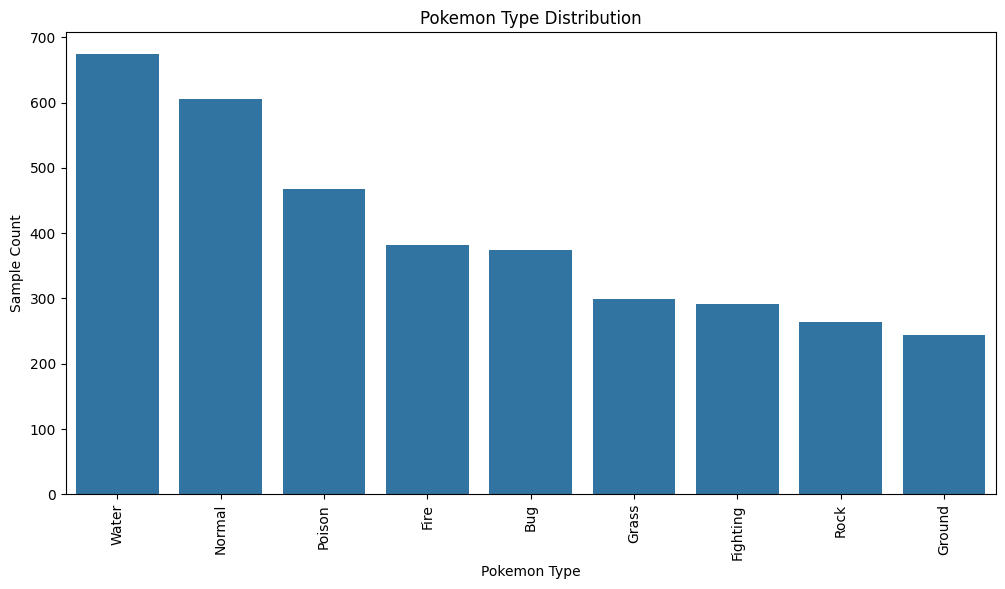

In [ ]:
#visualizing the labels with an histogram
type_counts = data['label'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Pokemon Type')
plt.ylabel('Sample Count')
plt.title('Pokemon Type Distribution')
plt.show()


Is this histogram the best way to visualize the data? Maybe we can try with a pie chart.

**C. Percentage representation of each class to assess class imbalances**

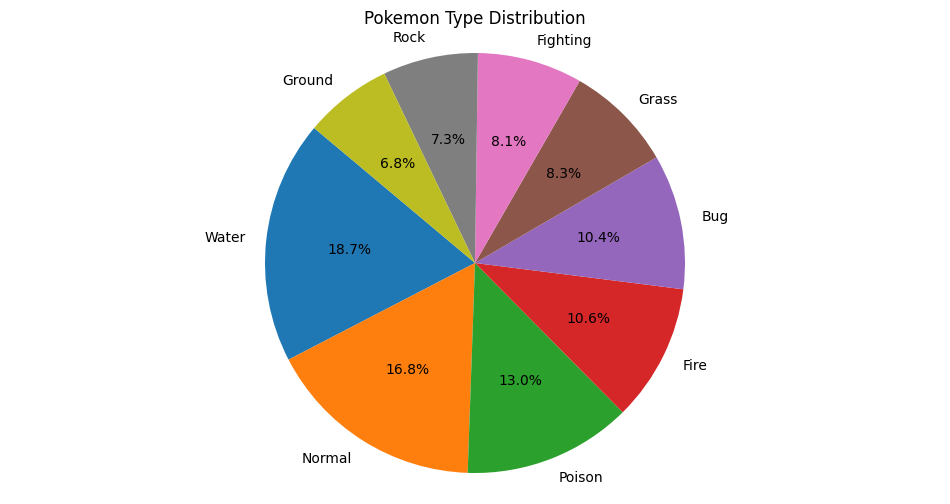

In [ ]:
#visualizing the labels with a pie chart
plt.figure(figsize=(12, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pokemon Type Distribution')
plt.show()

We can notice that the data is **imbalanced**. We will have to balance it before using it in our MLP.
Now that we have information about the **data**, we can look up for information about the **images**.

## 4. Analysing the images

In [ ]:
#check if all the images have the same size
image_sizes = []
for image in data['images']:
    image_sizes.append(Image.open(my_path + "Train/" + image).size)
image_sizes = np.array(image_sizes)
unique_sizes = np.unique(image_sizes, axis=0)
print(f"Number of different size of images: {len(unique_sizes)}")

#image sizes
image = Image.open(my_path +"Train/"+image)
print(f"Size of the image {id}: {image.size} pixels")

Number of different size of images: 1
Size of the image <built-in function id>: (64, 64) pixels


All the images have the same size **64*64 pixels**. Thanks to that, we can assume that there is **not any outliers**.

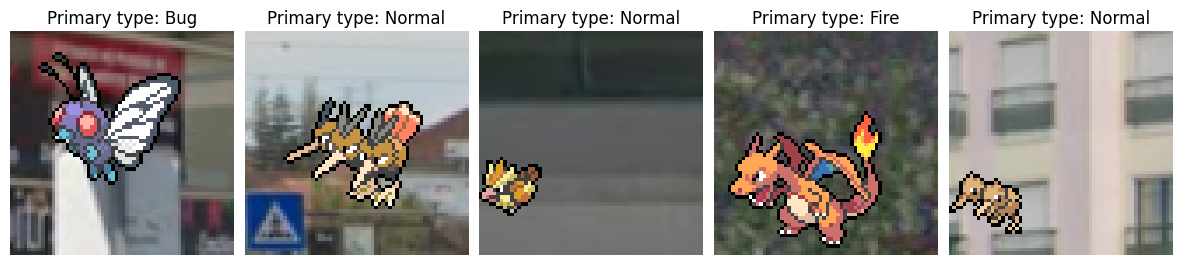

In [ ]:
#select 5 random images  and display them with their primary type
random_indices = random.sample(range(len(data)), 5)

fig, axs = plt.subplots(1, 5, figsize=(15, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.05)
axs = axs.ravel()

for i, idx in enumerate(random_indices):
    img = mpimg.imread(os.path.join(my_path + 'Train', data['images'][idx]))
    axs[i].imshow(img)
    axs[i].set_title("Primary type: " + data['label'][idx])
    axs[i].axis('off')

plt.show()

## 6. Summary and Conclusion

**Key Findings:**

- The dataset contains **3600** Pokémon images, each labeled with one of **9** different types.
- The class distribution analysis shows that:
  - The most frequent Pokémon type is **the Water type**, representing **18.7%** of the dataset.
  - The least frequent type is **the Ground type**, with only **6.8%** of the data.
  - These figures indicate a potential **class imbalance** that must be fixed.
- **Visualization of images** confirmed the **quality and consistency** of the dataset.

**Problem Identified:**

- **Class imbalance**: Some Pokémon types are underrepresented, which could lead to **biased model predictions**.
- **Data balancing needed**: To improve model generalization, techniques like **oversampling, undersampling, or synthetic data generation** may be required before gicing the data to our MLP.

# Balancing the data

Different methods to balance the data are available: oversampling, undersampling, SMOTE (Synthetic Minority Over-sampling Technique), adding some external data or modifying the loss function.

- Oversampling is duplicating or generating new data.
- Undersampling is reducing the number of training data.
- SMOTE method is generating synthetic new data.
- We can also add some external data.
- Finally, we can modify the loss function.

We chose to use the undersampling one, since we think having enough data to train our model.

**Applying UnderSampling**

In [ ]:
#taking the same number of images for each label
min_count = data['label'].value_counts().min()
balanced_data = data.groupby('label').apply(lambda x: x.sample(min_count)).reset_index(drop=True)
balanced_data['label'].value_counts()

<ipython-input-14-02dc67bf63d9>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_data = data.groupby('label').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


,count
label,
Bug,244
Fighting,244
Fire,244
Grass,244
Ground,244
Normal,244
Poison,244
Rock,244
Water,244


In [ ]:
#counting the number of images (inputs) for the balanced data
print("Number of images in the balanced data: ")
balanced_data['Id'].count()

Number of images in the balanced data: 


np.int64(2196)

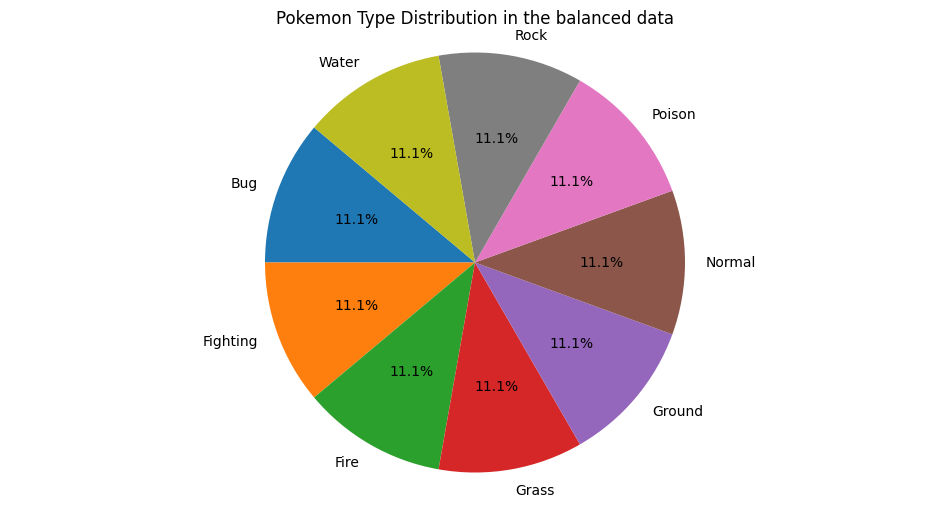

In [ ]:
#visualisation of the balanced data in a pie chart
balanced_type_counts = balanced_data['label'].value_counts()
plt.figure(figsize=(12, 6))
plt.pie(balanced_type_counts, labels=balanced_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pokemon Type Distribution in the balanced data')
plt.show()

Here's the specifications of this method:
| Advantages | Disadvantages  |
|------------|------------|
| Simple and quick to implement   | Loss of information (fewer examples) |
| Avoids overlearning on majority classes   | Less effective if dataset is already small |
| Can improve performance on minority classes |  Does not work well with small dataset|

Thus, we will use **2196 images** in our data to have a balanced dataset. We will loose 3600-2196=**1401 images** in our training phase.

# Model Development

## 1. Librairies importation

In [ ]:
import os

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Dataset, TensorDataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## 2. Images prepocessing

Given the images we have, the idea of removing the background and cetenring the images to simplify the training of our MLP naturally come.

In [ ]:
import cv2
import numpy as np
import os

# Set true to remove the background of the images in the Train folder
# Set false to remove the background of the images in the Test folder
ON_TRAINING = True

def center_pokemon(image, thresholded_image):
    """
    Center the Pokemon on it's picture

    :param image_path: path the image on which we want to center the pokemon
    :param thresholded_image_path: path to the image thresholded. This allow us
    to get easily the dimension of the pokemon
    :param output_path: path to where we want to save the picture

    :return centered_image, centered_thresholded_image: The centered images
    """
    # Invert the thresholded_image as we want the background to be black and the border white
    binary = cv2.bitwise_not(thresholded_image)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print("No black element found!")
        return

    x, y, w, h = cv2.boundingRect(contours[0])

    # Get image center
    img_h, img_w = image.shape[:2]
    center_x, center_y = img_w // 2, img_h // 2

    # Compute translation needed to center the element
    dx = center_x - (x + w // 2)
    dy = center_y - (y + h // 2)

    # Create translation matrix for RGB image
    M = np.float32([[1, 0, dx], [0, 1, dy]])

    # Apply translation to the RGB image
    centered_image = cv2.warpAffine(image, M, (img_w, img_h), borderValue=(255, 255, 255))  # White border
    centered_thresholded_image = cv2.warpAffine(thresholded_image, M, (img_w, img_h), borderValue=(255, 255, 255))

    return centered_image,centered_thresholded_image


def fix_border(image, save_path=None):
    """
    Most of the pixels of the border are black (i.e their value is 1) but few of them
    are grey (i.e their value is 32) so we make sure all the pixels are black.
    This will be helpful when we will apply the threshold to only keep the border.

    :param image: The input image in cv2 format and greyscale.
    :param save_path: Path to save the processed image.

    :return: The processed image in cv2 format.
    """
    height, width = image.shape
    processed_image = image.copy()

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            if image[y, x] == 32:
                if (image[y - 1, x] == 1 or image[y + 1, x] == 1 or  # Vertical neighbors
                        image[y, x - 1] == 1 or image[y, x + 1] == 1 or  # Horizontal neighbors
                        image[y - 1, x - 1] == 1 or image[y - 1, x + 1] == 1 or  # Top diagonals
                        image[y + 1, x - 1] == 1 or image[y + 1, x + 1] == 1):  # Bottom diagonals
                    processed_image[y, x] = 1

    if(save_path):
        cv2.imwrite(save_path, processed_image)

    return processed_image


def apply_threshold(image, save_path=None):
    """
    Apply a threshold to only keep the border.

    :param image: The image to which the threshold will be applied. Must be in cv2 format and greyscale.
    :param save_path: Path to save the processed image.

    :return: The threshold image cv2 format.
    """

    _, binary = cv2.threshold(image, 5, 255, cv2.THRESH_BINARY)

    if save_path:
        cv2.imwrite(save_path, binary)

    return binary


def erode_and_dilate(image, save_path=None):
    """
    Apply morphological erosion and dilatation to an image.
    Now that we applied the threshold to only keep the border, we can apply this in order
    to "fill" the inside of the border.
    Once the operations are applied, we get a mask that we can apply on the initial image

    :param image: The image to which the operations will be applied. Must be in cv2 format and greyscale.
    :param save_path: Path to save the processed image.

    :return: The image cv2 format after applying the erosion and dilatation.
    """

    # Define the area on which we apply the operation for each pixel
    kernel = np.ones((3, 3), np.uint8)

    # We may need to adjust the number of iterations
    # I experience few values and it seems that 9 is the best I found so far
    image = cv2.erode(image, kernel, iterations=10)
    image = cv2.dilate(image, kernel, iterations=10)

    if save_path:
        cv2.imwrite(save_path, image)
    return image

def apply_mask(image, mask, save_path=None):
    """
    Apply the mask we created on the initial image in order to remove the background.

    :param image: The image to which the mask will be applied.
    :param mask: The mask to apply on the initial image.
    :param save_path: Path to save the processed image.

    :return: The image cv2 format after applying the mask.
    If everything went fine, most of the background should have been removed.
    """

    inverted_mask = cv2.bitwise_not(mask)
    masked_image_inverted = cv2.bitwise_and(image, image, mask=inverted_mask)

    if save_path:
        cv2.imwrite(save_path, masked_image_inverted)

    return masked_image_inverted

def isolate_pokemon(image_name):
    """
    Apply every operation we need to remove the background so we can isolate the Pokemon.
    Once the operations are completed, save the processed image in the folder "Test_processed"
    with the same name.

    :param image_name: The name of the image in which we want to isolate the Pokemon.

    """
    if(ON_TRAINING):
        image = cv2.imread(my_path + "Train/" + str(image_name))
        grey_image = cv2.imread(my_path + "Train/" + str(image_name), cv2.IMREAD_GRAYSCALE)
    else:
        image = cv2.imread(my_path + "Test/" + str(image_name))
        grey_image = cv2.imread(my_path + "Test/" + str(image_name), cv2.IMREAD_GRAYSCALE)
    grey_image = fix_border(grey_image)
    grey_image = apply_threshold(grey_image, "thresholded.png")
    centered_image, grey_centered_image = center_pokemon(image,grey_image)
    grey_centered_image = erode_and_dilate(grey_centered_image)
    centered_image = apply_mask(centered_image,grey_centered_image)
    if(ON_TRAINING):
        if not os.path.exists(my_path + "Train_processed"):
            os.mkdir(my_path + "Train_processed")
        cv2.imwrite(my_path + "Train_processed/" + str(image_name), centered_image)
    else:
        if not os.path.exists(my_path + "Test_processed"):
            os.mkdir(my_path + "Test_processed")
        cv2.imwrite(my_path + "Test_processed/" + str(image_name), centered_image)

def isolate_every_pokemon():
    """
    Remove the background for every picture in the folder "Test" and save the processed image
    in the folder "Test_processed"
    """
    if(ON_TRAINING):
        if not os.path.exists(my_path + "Train"):
            print("The folder 'Train' does not exist.")
        else:
            for image_name in os.listdir(my_path + "Train"):
                isolate_pokemon(image_name)
    else:
        if not os.path.exists(my_path + "Test"):
            print("The folder 'Test' does not exist.")
        else:
            for image_name in os.listdir(my_path + "Test"):
                isolate_pokemon(image_name)



isolate_every_pokemon()

## 3. Data

In [ ]:
# Load labels
data_path = my_path +"train_labels.csv"
image_folder = my_path +"Train_processed"
labels_df = pd.read_csv(data_path)

In [ ]:
# Undersampling to balance classes
min_class_count = labels_df['label'].value_counts().min()
balanced_df = labels_df.groupby('label').apply(lambda x: x.sample(min_class_count)).reset_index(drop=True)

<ipython-input-20-d298f8173513>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = labels_df.groupby('label').apply(lambda x: x.sample(min_class_count)).reset_index(drop=True)


In [ ]:
# Train-validation split
train_df, val_df = train_test_split(balanced_df, test_size=0.2, stratify=balanced_df['label'])

In [ ]:
# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((64, 64)), #assure all images are 64x64
    transforms.ToTensor(), #convert to tensor pytorch
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) #normalize the images : problem when we do it !!!
])

## 4. Dataset creation

In [ ]:
# Create datasets

# Create label-to-index mapping
unique_labels = train_df["label"].unique()
label_map = {label: Id for Id, label in enumerate(unique_labels)}

# Function to load images and labels into tensors
def load_dataset(df, img_folder, transform):
    images = []
    labels = []

    for _, row in df.iterrows():
        img_path = os.path.join(my_path, img_folder, row["Id"] + ".png")  # Construct full image path
        image = Image.open(img_path).convert("RGB")  # Open image in RGB mode
        image = transform(image)  # Apply transformations

        images.append(image)
        labels.append(label_map[row["label"]])  # Convert label to integer

    # Convert to PyTorch tensors
    images_tensor = torch.stack(images)  # Stack list of images into a single tensor
    labels_tensor = torch.tensor(labels, dtype=torch.long)  # Convert labels to tensor

    return images_tensor, labels_tensor

# Load train and validation sets
train_images, train_labels = load_dataset(train_df, image_folder, transform)
val_images, val_labels = load_dataset(val_df, image_folder, transform)



# Create TensorDataset
train_dataset = TensorDataset(train_images, train_labels)
val_dataset = TensorDataset(val_images, val_labels)

# Create dataloaders (process data in batches, reducing memory usage)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

In [ ]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


## 5. Model definition

In [ ]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the image into a vector
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)  # Apply Softmax to the output
        return x

In [ ]:
# Model initialization
input_size = 64 * 64 * 3 #size of the images multiplicated by the number of channels : RGB
num_classes = len(train_df['label'].unique()) #number of classes = labels of pokémons
model = MLP(input_size, num_classes) #initialize model

In [ ]:
! pip install torchsummary

In [ ]:
# Print model summary : number of parameters, layers of the model
from torchsummary import summary
mlp = model.to(device)
summary(mlp,(3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]       3,145,984
              ReLU-2                  [-1, 256]               0
            Linear-3                  [-1, 128]          32,896
              ReLU-4                  [-1, 128]               0
            Linear-5                    [-1, 9]           1,161
           Softmax-6                    [-1, 9]               0
Total params: 3,180,041
Trainable params: 3,180,041
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 0.01
Params size (MB): 12.13
Estimated Total Size (MB): 12.18
----------------------------------------------------------------


## 6. Setting up MLFlow

To execute only if you have Databricks token.

In [ ]:
# !pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.0/684.0 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00


In [ ]:
# from random import random, randint
# from mlflow import log_metric, log_param, log_artifacts
# from mlflow.tracking import MlflowClient

In [ ]:
# import mlflow
# import mlflow.pytorch

In [ ]:
# # check databricks.txt
# mlflow.login()

2025/04/07 15:41:54 INFO mlflow.utils.credentials: No valid Databricks credentials found, please enter your credentials...


Databricks Host (should begin with https://): https://dbc-edfa1cca-da69.cloud.databricks.com
Token: ··········


2025/04/07 15:53:09 INFO mlflow.utils.credentials: Successfully connected to MLflow hosted tracking server! Host: https://dbc-edfa1cca-da69.cloud.databricks.com.


In [ ]:
# mlflow.set_tracking_uri("databricks")

In [ ]:
# experiment_name = "[Put your link]/Pokemon_Classification"

# existing_experiment = mlflow.get_experiment_by_name(experiment_name)

# if existing_experiment is None:
#     mlflow.create_experiment(
#         experiment_name,
#         artifact_location="dbfs:/Volumes/test/mlflow/Pokemon_Classification",
#     )

# mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='dbfs:/Volumes/test/mlflow/Pokemon_Classification', creation_time=1743068641069, experiment_id='2969168611654528', last_update_time=1743107463820, lifecycle_stage='active', name='/Users/hugo.werck@telecomnancy.net/Pokemon_Classification', tags={'mlflow.experiment.sourceName': '/Users/hugo.werck@telecomnancy.net/Pokemon_Classification',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'hugo.werck@telecomnancy.net',
 'mlflow.ownerId': '1419176588131537'}>

## 7. Model training and evaluation

In [ ]:
# Loss and optimizer definition
criterion = nn.CrossEntropyLoss() #loss function
optimizer = optim.Adam(model.parameters(), lr=0.001) #optimizer + lr = learning rate

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
early_stop = False

2025/04/07 15:53:12 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:53:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:53:14 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:53:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 15:53:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:53:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:53:19 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:53:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 1/200, Loss: 120.4444, Train Accuracy: 0.1264, Validation Accuracy: 0.1659, F1 Score: 0.1010


2025/04/07 15:53:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:53:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:53:23 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:53:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 2/200, Loss: 117.3668, Train Accuracy: 0.2175, Validation Accuracy: 0.2182, F1 Score: 0.1697


2025/04/07 15:53:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:53:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:53:27 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:53:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 3/200, Loss: 113.4995, Train Accuracy: 0.3024, Validation Accuracy: 0.2477, F1 Score: 0.2075


2025/04/07 15:53:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:53:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:53:31 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:53:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 4/200, Loss: 110.4772, Train Accuracy: 0.3542, Validation Accuracy: 0.2523, F1 Score: 0.2060


2025/04/07 15:53:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:53:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:53:34 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:53:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 5/200, Loss: 106.5320, Train Accuracy: 0.4374, Validation Accuracy: 0.2636, F1 Score: 0.2493


2025/04/07 15:53:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:53:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:53:39 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:53:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 6/200, Loss: 103.2860, Train Accuracy: 0.5040, Validation Accuracy: 0.2432, F1 Score: 0.2254


2025/04/07 15:53:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:53:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:53:42 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:53:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 7/200, Loss: 101.2996, Train Accuracy: 0.5410, Validation Accuracy: 0.2864, F1 Score: 0.2624


2025/04/07 15:53:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:53:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:53:46 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:53:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 8/200, Loss: 98.4639, Train Accuracy: 0.5877, Validation Accuracy: 0.3250, F1 Score: 0.3121
Epoch 9/200, Loss: 95.4570, Train Accuracy: 0.6486, Validation Accuracy: 0.2773, F1 Score: 0.2743


2025/04/07 15:53:50 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:53:50 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:53:50 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:53:50 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 15:53:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:53:54 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:53:54 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:53:54 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 10/200, Loss: 93.1328, Train Accuracy: 0.6862, Validation Accuracy: 0.3000, F1 Score: 0.2933


2025/04/07 15:53:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:53:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:53:57 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:53:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 11/200, Loss: 92.1446, Train Accuracy: 0.7062, Validation Accuracy: 0.3068, F1 Score: 0.3030


2025/04/07 15:54:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:54:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:54:01 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:54:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 12/200, Loss: 90.4701, Train Accuracy: 0.7375, Validation Accuracy: 0.3295, F1 Score: 0.3255


2025/04/07 15:54:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:54:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:54:06 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:54:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 13/200, Loss: 89.1168, Train Accuracy: 0.7574, Validation Accuracy: 0.3114, F1 Score: 0.2961


2025/04/07 15:54:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:54:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:54:10 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:54:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 14/200, Loss: 88.2568, Train Accuracy: 0.7739, Validation Accuracy: 0.3114, F1 Score: 0.3030


2025/04/07 15:54:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:54:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:54:14 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:54:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 15/200, Loss: 87.6827, Train Accuracy: 0.7813, Validation Accuracy: 0.3432, F1 Score: 0.3367


2025/04/07 15:54:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:54:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:54:18 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:54:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 16/200, Loss: 86.7407, Train Accuracy: 0.8007, Validation Accuracy: 0.3091, F1 Score: 0.3022


2025/04/07 15:54:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:54:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:54:23 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:54:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 17/200, Loss: 85.9360, Train Accuracy: 0.8149, Validation Accuracy: 0.2886, F1 Score: 0.2790


2025/04/07 15:54:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:54:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:54:27 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:54:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 18/200, Loss: 85.3813, Train Accuracy: 0.8218, Validation Accuracy: 0.2909, F1 Score: 0.2946
Epoch 19/200, Loss: 85.3088, Train Accuracy: 0.8223, Validation Accuracy: 0.3091, F1 Score: 0.3064


2025/04/07 15:54:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:54:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:54:31 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:54:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 15:54:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:54:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:54:35 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:54:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 20/200, Loss: 85.2345, Train Accuracy: 0.8235, Validation Accuracy: 0.3318, F1 Score: 0.3236


2025/04/07 15:54:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:54:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:54:40 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:54:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 21/200, Loss: 84.1346, Train Accuracy: 0.8440, Validation Accuracy: 0.3500, F1 Score: 0.3355


2025/04/07 15:54:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:54:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:54:44 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:54:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 22/200, Loss: 84.1047, Train Accuracy: 0.8445, Validation Accuracy: 0.3364, F1 Score: 0.3214


2025/04/07 15:54:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:54:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:54:48 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:54:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 23/200, Loss: 83.8217, Train Accuracy: 0.8468, Validation Accuracy: 0.3182, F1 Score: 0.3127


2025/04/07 15:54:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:54:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:54:52 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:54:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 24/200, Loss: 83.9133, Train Accuracy: 0.8479, Validation Accuracy: 0.3614, F1 Score: 0.3557


2025/04/07 15:54:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:54:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:54:56 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:54:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 25/200, Loss: 83.3582, Train Accuracy: 0.8582, Validation Accuracy: 0.3500, F1 Score: 0.3459


2025/04/07 15:55:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:55:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:55:01 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:55:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 26/200, Loss: 83.0923, Train Accuracy: 0.8616, Validation Accuracy: 0.3455, F1 Score: 0.3414


2025/04/07 15:55:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:55:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:55:05 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:55:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 27/200, Loss: 82.8916, Train Accuracy: 0.8656, Validation Accuracy: 0.3432, F1 Score: 0.3266


2025/04/07 15:55:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:55:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:55:09 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:55:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 28/200, Loss: 83.0430, Train Accuracy: 0.8628, Validation Accuracy: 0.3523, F1 Score: 0.3494
Epoch 29/200, Loss: 82.7607, Train Accuracy: 0.8667, Validation Accuracy: 0.3659, F1 Score: 0.3542


2025/04/07 15:55:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:55:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:55:14 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:55:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 15:55:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:55:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:55:18 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:55:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 30/200, Loss: 82.4637, Train Accuracy: 0.8741, Validation Accuracy: 0.3409, F1 Score: 0.3354


2025/04/07 15:55:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:55:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:55:22 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:55:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 31/200, Loss: 82.5233, Train Accuracy: 0.8719, Validation Accuracy: 0.3682, F1 Score: 0.3578


2025/04/07 15:55:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:55:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:55:27 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:55:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 32/200, Loss: 82.4085, Train Accuracy: 0.8719, Validation Accuracy: 0.3568, F1 Score: 0.3550


2025/04/07 15:55:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:55:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:55:31 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:55:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 33/200, Loss: 82.1879, Train Accuracy: 0.8764, Validation Accuracy: 0.3523, F1 Score: 0.3448


2025/04/07 15:55:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:55:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:55:35 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:55:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 34/200, Loss: 82.2372, Train Accuracy: 0.8759, Validation Accuracy: 0.3455, F1 Score: 0.3271


2025/04/07 15:55:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:55:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:55:40 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:55:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 35/200, Loss: 82.1921, Train Accuracy: 0.8776, Validation Accuracy: 0.3364, F1 Score: 0.3288


2025/04/07 15:55:45 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:55:45 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:55:45 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:55:45 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 36/200, Loss: 81.9393, Train Accuracy: 0.8815, Validation Accuracy: 0.3318, F1 Score: 0.3333


2025/04/07 15:55:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:55:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:55:49 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:55:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 37/200, Loss: 81.7369, Train Accuracy: 0.8861, Validation Accuracy: 0.3545, F1 Score: 0.3498


2025/04/07 15:55:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:55:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:55:53 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:55:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 38/200, Loss: 82.5196, Train Accuracy: 0.8696, Validation Accuracy: 0.3227, F1 Score: 0.3202
Epoch 39/200, Loss: 81.7890, Train Accuracy: 0.8867, Validation Accuracy: 0.3386, F1 Score: 0.3400


2025/04/07 15:55:58 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:55:58 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:55:58 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:55:58 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 15:56:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:56:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:56:01 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:56:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 40/200, Loss: 81.4937, Train Accuracy: 0.8912, Validation Accuracy: 0.3250, F1 Score: 0.3220


2025/04/07 15:56:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:56:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:56:05 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:56:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 41/200, Loss: 81.6212, Train Accuracy: 0.8878, Validation Accuracy: 0.3250, F1 Score: 0.3130


2025/04/07 15:56:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:56:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:56:10 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:56:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 42/200, Loss: 81.9617, Train Accuracy: 0.8827, Validation Accuracy: 0.3455, F1 Score: 0.3373


2025/04/07 15:56:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:56:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:56:14 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:56:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 43/200, Loss: 81.4864, Train Accuracy: 0.8912, Validation Accuracy: 0.3386, F1 Score: 0.3300


2025/04/07 15:56:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:56:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:56:18 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:56:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 44/200, Loss: 81.3976, Train Accuracy: 0.8907, Validation Accuracy: 0.3250, F1 Score: 0.3198


2025/04/07 15:56:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:56:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:56:23 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:56:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 45/200, Loss: 81.3794, Train Accuracy: 0.8924, Validation Accuracy: 0.3295, F1 Score: 0.3161


2025/04/07 15:56:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:56:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:56:27 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:56:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 46/200, Loss: 82.1269, Train Accuracy: 0.8770, Validation Accuracy: 0.3159, F1 Score: 0.2966


2025/04/07 15:56:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:56:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:56:31 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:56:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 47/200, Loss: 81.3829, Train Accuracy: 0.8929, Validation Accuracy: 0.3318, F1 Score: 0.3311
Epoch 48/200, Loss: 81.5212, Train Accuracy: 0.8901, Validation Accuracy: 0.3295, F1 Score: 0.3194


2025/04/07 15:56:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:56:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:56:36 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:56:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 15:56:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:56:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:56:40 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:56:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 49/200, Loss: 81.2596, Train Accuracy: 0.8946, Validation Accuracy: 0.3500, F1 Score: 0.3475


2025/04/07 15:56:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:56:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:56:44 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:56:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 50/200, Loss: 81.5909, Train Accuracy: 0.8890, Validation Accuracy: 0.3091, F1 Score: 0.3019


2025/04/07 15:56:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:56:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:56:49 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:56:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 51/200, Loss: 81.8122, Train Accuracy: 0.8855, Validation Accuracy: 0.3318, F1 Score: 0.3287


2025/04/07 15:56:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:56:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:56:53 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:56:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 52/200, Loss: 81.4346, Train Accuracy: 0.8907, Validation Accuracy: 0.2977, F1 Score: 0.3011


2025/04/07 15:56:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:56:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:56:56 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:56:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 53/200, Loss: 82.2335, Train Accuracy: 0.8770, Validation Accuracy: 0.2886, F1 Score: 0.2868


2025/04/07 15:57:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:57:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:57:00 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:57:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 54/200, Loss: 82.8269, Train Accuracy: 0.8667, Validation Accuracy: 0.2932, F1 Score: 0.2874


2025/04/07 15:57:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:57:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:57:05 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:57:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 55/200, Loss: 82.9903, Train Accuracy: 0.8645, Validation Accuracy: 0.3386, F1 Score: 0.3271


2025/04/07 15:57:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:57:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:57:09 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:57:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 56/200, Loss: 81.8736, Train Accuracy: 0.8844, Validation Accuracy: 0.3023, F1 Score: 0.2920
Epoch 57/200, Loss: 81.7657, Train Accuracy: 0.8855, Validation Accuracy: 0.3364, F1 Score: 0.3261


2025/04/07 15:57:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:57:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:57:14 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:57:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 15:57:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:57:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:57:19 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:57:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 58/200, Loss: 82.0147, Train Accuracy: 0.8821, Validation Accuracy: 0.3159, F1 Score: 0.2986


2025/04/07 15:57:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:57:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:57:22 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:57:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 59/200, Loss: 81.9601, Train Accuracy: 0.8810, Validation Accuracy: 0.3295, F1 Score: 0.3219


2025/04/07 15:57:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:57:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:57:26 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:57:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 60/200, Loss: 81.6084, Train Accuracy: 0.8884, Validation Accuracy: 0.3341, F1 Score: 0.3256


2025/04/07 15:57:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:57:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:57:31 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:57:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 61/200, Loss: 81.5593, Train Accuracy: 0.8895, Validation Accuracy: 0.3432, F1 Score: 0.3348


2025/04/07 15:57:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:57:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:57:35 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:57:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 62/200, Loss: 81.2129, Train Accuracy: 0.8946, Validation Accuracy: 0.3318, F1 Score: 0.3214


2025/04/07 15:57:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:57:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:57:39 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:57:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 63/200, Loss: 81.1062, Train Accuracy: 0.8964, Validation Accuracy: 0.3273, F1 Score: 0.3156


2025/04/07 15:57:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:57:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:57:43 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:57:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 64/200, Loss: 80.6479, Train Accuracy: 0.9049, Validation Accuracy: 0.3386, F1 Score: 0.3246


2025/04/07 15:57:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:57:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:57:48 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:57:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 65/200, Loss: 80.6729, Train Accuracy: 0.9049, Validation Accuracy: 0.3250, F1 Score: 0.3103


2025/04/07 15:57:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:57:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:57:52 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:57:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 66/200, Loss: 80.9983, Train Accuracy: 0.8981, Validation Accuracy: 0.3591, F1 Score: 0.3536
Epoch 67/200, Loss: 81.1373, Train Accuracy: 0.8964, Validation Accuracy: 0.3432, F1 Score: 0.3317


2025/04/07 15:57:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:57:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:57:56 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:57:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 15:58:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:58:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:58:01 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:58:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 68/200, Loss: 80.6160, Train Accuracy: 0.9049, Validation Accuracy: 0.3727, F1 Score: 0.3577


2025/04/07 15:58:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:58:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:58:05 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:58:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 69/200, Loss: 80.9702, Train Accuracy: 0.8986, Validation Accuracy: 0.3409, F1 Score: 0.3361


2025/04/07 15:58:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:58:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:58:09 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:58:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 70/200, Loss: 80.8271, Train Accuracy: 0.9032, Validation Accuracy: 0.3318, F1 Score: 0.3234


2025/04/07 15:58:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:58:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:58:14 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:58:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 71/200, Loss: 80.8042, Train Accuracy: 0.9026, Validation Accuracy: 0.3273, F1 Score: 0.3174


2025/04/07 15:58:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:58:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:58:18 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:58:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 72/200, Loss: 80.8223, Train Accuracy: 0.9026, Validation Accuracy: 0.3364, F1 Score: 0.3224


2025/04/07 15:58:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:58:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:58:22 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:58:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 73/200, Loss: 81.2323, Train Accuracy: 0.8946, Validation Accuracy: 0.3500, F1 Score: 0.3455


2025/04/07 15:58:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:58:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:58:26 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:58:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 74/200, Loss: 80.8470, Train Accuracy: 0.9021, Validation Accuracy: 0.3545, F1 Score: 0.3520


2025/04/07 15:58:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:58:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:58:30 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:58:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 75/200, Loss: 81.0326, Train Accuracy: 0.8981, Validation Accuracy: 0.3273, F1 Score: 0.3168


2025/04/07 15:58:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:58:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:58:35 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:58:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 76/200, Loss: 81.2474, Train Accuracy: 0.8935, Validation Accuracy: 0.3023, F1 Score: 0.3072
Epoch 77/200, Loss: 81.6548, Train Accuracy: 0.8872, Validation Accuracy: 0.3523, F1 Score: 0.3413


2025/04/07 15:58:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:58:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:58:40 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:58:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 15:58:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:58:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:58:44 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:58:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 78/200, Loss: 81.4107, Train Accuracy: 0.8901, Validation Accuracy: 0.3227, F1 Score: 0.3204


2025/04/07 15:58:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:58:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:58:48 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:58:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 79/200, Loss: 81.9846, Train Accuracy: 0.8810, Validation Accuracy: 0.3000, F1 Score: 0.2977


2025/04/07 15:58:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:58:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:58:52 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:58:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 80/200, Loss: 81.7041, Train Accuracy: 0.8861, Validation Accuracy: 0.2841, F1 Score: 0.2845


2025/04/07 15:58:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:58:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:58:56 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:58:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 81/200, Loss: 81.6680, Train Accuracy: 0.8855, Validation Accuracy: 0.3000, F1 Score: 0.3040


2025/04/07 15:59:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:59:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:59:00 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:59:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 82/200, Loss: 81.0977, Train Accuracy: 0.8981, Validation Accuracy: 0.3159, F1 Score: 0.2984


2025/04/07 15:59:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:59:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:59:05 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:59:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 83/200, Loss: 82.1436, Train Accuracy: 0.8781, Validation Accuracy: 0.3045, F1 Score: 0.2906


2025/04/07 15:59:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:59:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:59:09 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:59:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 84/200, Loss: 82.3827, Train Accuracy: 0.8741, Validation Accuracy: 0.3068, F1 Score: 0.2927


2025/04/07 15:59:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:59:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:59:13 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:59:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 85/200, Loss: 81.9775, Train Accuracy: 0.8815, Validation Accuracy: 0.3091, F1 Score: 0.3136
Epoch 86/200, Loss: 81.8916, Train Accuracy: 0.8815, Validation Accuracy: 0.3432, F1 Score: 0.3322


2025/04/07 15:59:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:59:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:59:18 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:59:18 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 15:59:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:59:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:59:22 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:59:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 87/200, Loss: 83.0598, Train Accuracy: 0.8616, Validation Accuracy: 0.3159, F1 Score: 0.2940


2025/04/07 15:59:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:59:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:59:27 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:59:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 88/200, Loss: 82.0660, Train Accuracy: 0.8815, Validation Accuracy: 0.3227, F1 Score: 0.3020


2025/04/07 15:59:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:59:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:59:31 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:59:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 89/200, Loss: 80.9069, Train Accuracy: 0.9015, Validation Accuracy: 0.3318, F1 Score: 0.3154


2025/04/07 15:59:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:59:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:59:35 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:59:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 90/200, Loss: 81.2163, Train Accuracy: 0.8946, Validation Accuracy: 0.3273, F1 Score: 0.3236


2025/04/07 15:59:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:59:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:59:39 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:59:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 91/200, Loss: 80.6693, Train Accuracy: 0.9043, Validation Accuracy: 0.3318, F1 Score: 0.3076


2025/04/07 15:59:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:59:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:59:43 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:59:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 92/200, Loss: 80.9462, Train Accuracy: 0.8992, Validation Accuracy: 0.3250, F1 Score: 0.3199


2025/04/07 15:59:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:59:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:59:48 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:59:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 93/200, Loss: 81.1543, Train Accuracy: 0.8952, Validation Accuracy: 0.3341, F1 Score: 0.3279


2025/04/07 15:59:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:59:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:59:52 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:59:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 94/200, Loss: 81.3881, Train Accuracy: 0.8924, Validation Accuracy: 0.3295, F1 Score: 0.3250


2025/04/07 15:59:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 15:59:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 15:59:56 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 15:59:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 95/200, Loss: 80.5417, Train Accuracy: 0.9072, Validation Accuracy: 0.3091, F1 Score: 0.3010
Epoch 96/200, Loss: 81.5553, Train Accuracy: 0.8872, Validation Accuracy: 0.3114, F1 Score: 0.2991


2025/04/07 16:00:02 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:00:02 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:00:02 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:00:02 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 16:00:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:00:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:00:06 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:00:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 97/200, Loss: 81.3082, Train Accuracy: 0.8929, Validation Accuracy: 0.3250, F1 Score: 0.3137


2025/04/07 16:00:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:00:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:00:10 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:00:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 98/200, Loss: 81.4333, Train Accuracy: 0.8918, Validation Accuracy: 0.3295, F1 Score: 0.3289


2025/04/07 16:00:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:00:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:00:15 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:00:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 99/200, Loss: 80.7855, Train Accuracy: 0.9021, Validation Accuracy: 0.3500, F1 Score: 0.3389


2025/04/07 16:00:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:00:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:00:19 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:00:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 100/200, Loss: 80.6508, Train Accuracy: 0.9043, Validation Accuracy: 0.3364, F1 Score: 0.3264


2025/04/07 16:00:24 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:00:24 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:00:24 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:00:24 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 101/200, Loss: 80.4752, Train Accuracy: 0.9089, Validation Accuracy: 0.3409, F1 Score: 0.3329


2025/04/07 16:00:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:00:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:00:29 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:00:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 102/200, Loss: 80.3337, Train Accuracy: 0.9112, Validation Accuracy: 0.3227, F1 Score: 0.3214


2025/04/07 16:00:33 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:00:33 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:00:33 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:00:33 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 103/200, Loss: 80.4763, Train Accuracy: 0.9083, Validation Accuracy: 0.3409, F1 Score: 0.3300


2025/04/07 16:00:38 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:00:38 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:00:38 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:00:38 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 104/200, Loss: 80.3714, Train Accuracy: 0.9100, Validation Accuracy: 0.3295, F1 Score: 0.3198


2025/04/07 16:00:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:00:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:00:43 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:00:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 105/200, Loss: 79.9033, Train Accuracy: 0.9191, Validation Accuracy: 0.3386, F1 Score: 0.3279


2025/04/07 16:00:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:00:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:00:48 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:00:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 106/200, Loss: 80.0212, Train Accuracy: 0.9163, Validation Accuracy: 0.3364, F1 Score: 0.3199


2025/04/07 16:00:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:00:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:00:52 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:00:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 107/200, Loss: 79.9747, Train Accuracy: 0.9174, Validation Accuracy: 0.3341, F1 Score: 0.3241


2025/04/07 16:00:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:00:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:00:57 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:00:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 108/200, Loss: 80.0178, Train Accuracy: 0.9169, Validation Accuracy: 0.3227, F1 Score: 0.3117


2025/04/07 16:01:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:01:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:01:01 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:01:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 109/200, Loss: 80.2191, Train Accuracy: 0.9129, Validation Accuracy: 0.3386, F1 Score: 0.3266


2025/04/07 16:01:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:01:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:01:06 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:01:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 110/200, Loss: 80.3157, Train Accuracy: 0.9112, Validation Accuracy: 0.3386, F1 Score: 0.3323


2025/04/07 16:01:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:01:12 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:01:12 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:01:12 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 111/200, Loss: 79.9391, Train Accuracy: 0.9186, Validation Accuracy: 0.3409, F1 Score: 0.3356


2025/04/07 16:01:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:01:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:01:16 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:01:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 112/200, Loss: 80.5161, Train Accuracy: 0.9077, Validation Accuracy: 0.3045, F1 Score: 0.2953


2025/04/07 16:01:20 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:01:20 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:01:20 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:01:20 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 113/200, Loss: 81.2972, Train Accuracy: 0.8941, Validation Accuracy: 0.3409, F1 Score: 0.3198


2025/04/07 16:01:25 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:01:25 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:01:25 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:01:25 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 114/200, Loss: 81.1540, Train Accuracy: 0.8964, Validation Accuracy: 0.3159, F1 Score: 0.2959
Epoch 115/200, Loss: 82.2561, Train Accuracy: 0.8753, Validation Accuracy: 0.3136, F1 Score: 0.2976


2025/04/07 16:01:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:01:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:01:30 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:01:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 16:01:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:01:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:01:35 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:01:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 116/200, Loss: 83.1746, Train Accuracy: 0.8605, Validation Accuracy: 0.3205, F1 Score: 0.3111


2025/04/07 16:01:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:01:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:01:40 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:01:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 117/200, Loss: 82.2108, Train Accuracy: 0.8770, Validation Accuracy: 0.2750, F1 Score: 0.2593


2025/04/07 16:01:45 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:01:45 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:01:45 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:01:45 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 118/200, Loss: 84.8002, Train Accuracy: 0.8286, Validation Accuracy: 0.3045, F1 Score: 0.2871


2025/04/07 16:01:50 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:01:50 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:01:50 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:01:50 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 119/200, Loss: 83.4278, Train Accuracy: 0.8542, Validation Accuracy: 0.3023, F1 Score: 0.2918


2025/04/07 16:01:55 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:01:55 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:01:55 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:01:55 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 120/200, Loss: 82.4894, Train Accuracy: 0.8702, Validation Accuracy: 0.2591, F1 Score: 0.2437


2025/04/07 16:01:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:01:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:01:59 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:01:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 121/200, Loss: 82.1669, Train Accuracy: 0.8764, Validation Accuracy: 0.3045, F1 Score: 0.3013


2025/04/07 16:02:04 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:02:04 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:02:04 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:02:04 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 122/200, Loss: 82.2355, Train Accuracy: 0.8753, Validation Accuracy: 0.3000, F1 Score: 0.2927


2025/04/07 16:02:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:02:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:02:09 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:02:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 123/200, Loss: 82.5399, Train Accuracy: 0.8713, Validation Accuracy: 0.3045, F1 Score: 0.2959


2025/04/07 16:02:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:02:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:02:13 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:02:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 124/200, Loss: 81.0689, Train Accuracy: 0.8986, Validation Accuracy: 0.3182, F1 Score: 0.3089
Epoch 125/200, Loss: 81.3447, Train Accuracy: 0.8946, Validation Accuracy: 0.3000, F1 Score: 0.3021


2025/04/07 16:02:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:02:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:02:19 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:02:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 16:02:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:02:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:02:23 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:02:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 126/200, Loss: 81.5001, Train Accuracy: 0.8901, Validation Accuracy: 0.3182, F1 Score: 0.2977


2025/04/07 16:02:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:02:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:02:28 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:02:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 127/200, Loss: 82.2533, Train Accuracy: 0.8787, Validation Accuracy: 0.2795, F1 Score: 0.2836


2025/04/07 16:02:33 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:02:33 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:02:33 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:02:33 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 128/200, Loss: 81.1835, Train Accuracy: 0.8952, Validation Accuracy: 0.3023, F1 Score: 0.3012


2025/04/07 16:02:38 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:02:38 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:02:38 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:02:38 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 129/200, Loss: 81.5344, Train Accuracy: 0.8884, Validation Accuracy: 0.3091, F1 Score: 0.2880


2025/04/07 16:02:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:02:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:02:42 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:02:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 130/200, Loss: 80.7535, Train Accuracy: 0.9032, Validation Accuracy: 0.2977, F1 Score: 0.2974


2025/04/07 16:02:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:02:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:02:47 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:02:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 131/200, Loss: 80.4429, Train Accuracy: 0.9095, Validation Accuracy: 0.2909, F1 Score: 0.2839


2025/04/07 16:02:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:02:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:02:52 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:02:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 132/200, Loss: 80.6707, Train Accuracy: 0.9049, Validation Accuracy: 0.3091, F1 Score: 0.3013


2025/04/07 16:02:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:02:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:02:56 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:02:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 133/200, Loss: 80.3605, Train Accuracy: 0.9106, Validation Accuracy: 0.3000, F1 Score: 0.2829
Epoch 134/200, Loss: 80.3119, Train Accuracy: 0.9106, Validation Accuracy: 0.3227, F1 Score: 0.3126


2025/04/07 16:03:02 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:03:02 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:03:02 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:03:02 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 16:03:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:03:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:03:07 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:03:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 135/200, Loss: 80.4967, Train Accuracy: 0.9077, Validation Accuracy: 0.3205, F1 Score: 0.3075


2025/04/07 16:03:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:03:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:03:11 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:03:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 136/200, Loss: 79.9032, Train Accuracy: 0.9180, Validation Accuracy: 0.3341, F1 Score: 0.3302


2025/04/07 16:03:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:03:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:03:16 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:03:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 137/200, Loss: 79.9777, Train Accuracy: 0.9169, Validation Accuracy: 0.3182, F1 Score: 0.3050


2025/04/07 16:03:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:03:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:03:21 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:03:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 138/200, Loss: 79.9849, Train Accuracy: 0.9169, Validation Accuracy: 0.3364, F1 Score: 0.3255


2025/04/07 16:03:25 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:03:25 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:03:25 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:03:25 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 139/200, Loss: 79.7643, Train Accuracy: 0.9214, Validation Accuracy: 0.3295, F1 Score: 0.3232


2025/04/07 16:03:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:03:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:03:30 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:03:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 140/200, Loss: 79.7450, Train Accuracy: 0.9220, Validation Accuracy: 0.3273, F1 Score: 0.3212


2025/04/07 16:03:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:03:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:03:35 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:03:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 141/200, Loss: 79.7681, Train Accuracy: 0.9214, Validation Accuracy: 0.3227, F1 Score: 0.3173


2025/04/07 16:03:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:03:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:03:40 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:03:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 142/200, Loss: 79.7667, Train Accuracy: 0.9214, Validation Accuracy: 0.3227, F1 Score: 0.3164


2025/04/07 16:03:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:03:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:03:46 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:03:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 143/200, Loss: 79.7608, Train Accuracy: 0.9214, Validation Accuracy: 0.3182, F1 Score: 0.3155


2025/04/07 16:03:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:03:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:03:51 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:03:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 144/200, Loss: 79.6788, Train Accuracy: 0.9231, Validation Accuracy: 0.3159, F1 Score: 0.3127


2025/04/07 16:03:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:03:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:03:56 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:03:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 145/200, Loss: 79.6654, Train Accuracy: 0.9231, Validation Accuracy: 0.3159, F1 Score: 0.3115


2025/04/07 16:04:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:04:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:04:01 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:04:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 146/200, Loss: 79.6762, Train Accuracy: 0.9231, Validation Accuracy: 0.3136, F1 Score: 0.3104


2025/04/07 16:04:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:04:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:04:06 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:04:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 147/200, Loss: 79.6934, Train Accuracy: 0.9231, Validation Accuracy: 0.3136, F1 Score: 0.3087


2025/04/07 16:04:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:04:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:04:11 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:04:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 148/200, Loss: 80.2955, Train Accuracy: 0.9117, Validation Accuracy: 0.2932, F1 Score: 0.2769


2025/04/07 16:04:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:04:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:04:16 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:04:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 149/200, Loss: 80.4823, Train Accuracy: 0.9083, Validation Accuracy: 0.2909, F1 Score: 0.2820


2025/04/07 16:04:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:04:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:04:21 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:04:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 150/200, Loss: 80.5910, Train Accuracy: 0.9060, Validation Accuracy: 0.2932, F1 Score: 0.2901


2025/04/07 16:04:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:04:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:04:26 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:04:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 151/200, Loss: 80.2509, Train Accuracy: 0.9123, Validation Accuracy: 0.2750, F1 Score: 0.2762


2025/04/07 16:04:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:04:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:04:31 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:04:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 152/200, Loss: 81.1322, Train Accuracy: 0.8964, Validation Accuracy: 0.2955, F1 Score: 0.2797
Epoch 153/200, Loss: 81.9600, Train Accuracy: 0.8815, Validation Accuracy: 0.2955, F1 Score: 0.2818


2025/04/07 16:04:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:04:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:04:36 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:04:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 16:04:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:04:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:04:41 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:04:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 154/200, Loss: 81.5741, Train Accuracy: 0.8895, Validation Accuracy: 0.3091, F1 Score: 0.2918


2025/04/07 16:04:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:04:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:04:46 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:04:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 155/200, Loss: 81.8849, Train Accuracy: 0.8821, Validation Accuracy: 0.3136, F1 Score: 0.3032


2025/04/07 16:04:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:04:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:04:51 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:04:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 156/200, Loss: 81.4499, Train Accuracy: 0.8907, Validation Accuracy: 0.3205, F1 Score: 0.3136


2025/04/07 16:04:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:04:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:04:56 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:04:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 157/200, Loss: 81.1777, Train Accuracy: 0.8964, Validation Accuracy: 0.3273, F1 Score: 0.3299


2025/04/07 16:05:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:05:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:05:01 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:05:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 158/200, Loss: 81.9964, Train Accuracy: 0.8815, Validation Accuracy: 0.3273, F1 Score: 0.3228


2025/04/07 16:05:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:05:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:05:06 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:05:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 159/200, Loss: 81.9876, Train Accuracy: 0.8815, Validation Accuracy: 0.3023, F1 Score: 0.2934


2025/04/07 16:05:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:05:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:05:11 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:05:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 160/200, Loss: 81.0579, Train Accuracy: 0.8992, Validation Accuracy: 0.3182, F1 Score: 0.3177


2025/04/07 16:05:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:05:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:05:15 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:05:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 161/200, Loss: 80.6335, Train Accuracy: 0.9049, Validation Accuracy: 0.3432, F1 Score: 0.3387


2025/04/07 16:05:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:05:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:05:21 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:05:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 162/200, Loss: 80.9006, Train Accuracy: 0.9009, Validation Accuracy: 0.3091, F1 Score: 0.3014
Epoch 163/200, Loss: 81.1055, Train Accuracy: 0.8969, Validation Accuracy: 0.2977, F1 Score: 0.2860


2025/04/07 16:05:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:05:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:05:26 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:05:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 16:05:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:05:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:05:30 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:05:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 164/200, Loss: 80.6532, Train Accuracy: 0.9038, Validation Accuracy: 0.3250, F1 Score: 0.3119


2025/04/07 16:05:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:05:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:05:36 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:05:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 165/200, Loss: 80.1551, Train Accuracy: 0.9140, Validation Accuracy: 0.3341, F1 Score: 0.3246


2025/04/07 16:05:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:05:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:05:41 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:05:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 166/200, Loss: 80.1428, Train Accuracy: 0.9146, Validation Accuracy: 0.3341, F1 Score: 0.3236


2025/04/07 16:05:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:05:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:05:46 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:05:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 167/200, Loss: 80.1094, Train Accuracy: 0.9151, Validation Accuracy: 0.3205, F1 Score: 0.3034


2025/04/07 16:05:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:05:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:05:51 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:05:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 168/200, Loss: 80.4209, Train Accuracy: 0.9089, Validation Accuracy: 0.2977, F1 Score: 0.2931


2025/04/07 16:05:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:05:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:05:56 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:05:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 169/200, Loss: 80.1690, Train Accuracy: 0.9146, Validation Accuracy: 0.3136, F1 Score: 0.3105


2025/04/07 16:06:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:06:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:06:01 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:06:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 170/200, Loss: 79.9756, Train Accuracy: 0.9180, Validation Accuracy: 0.2932, F1 Score: 0.2846


2025/04/07 16:06:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:06:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:06:06 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:06:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 171/200, Loss: 81.0579, Train Accuracy: 0.8969, Validation Accuracy: 0.2955, F1 Score: 0.2842
Epoch 172/200, Loss: 80.3125, Train Accuracy: 0.9117, Validation Accuracy: 0.3250, F1 Score: 0.3121


2025/04/07 16:06:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:06:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:06:10 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:06:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 16:06:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:06:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:06:16 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:06:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 173/200, Loss: 80.5087, Train Accuracy: 0.9083, Validation Accuracy: 0.3136, F1 Score: 0.3102


2025/04/07 16:06:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:06:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:06:21 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:06:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 174/200, Loss: 81.0507, Train Accuracy: 0.8969, Validation Accuracy: 0.3114, F1 Score: 0.3073


2025/04/07 16:06:25 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:06:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:06:26 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:06:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 175/200, Loss: 80.4921, Train Accuracy: 0.9072, Validation Accuracy: 0.3023, F1 Score: 0.2981


2025/04/07 16:06:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:06:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:06:31 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:06:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 176/200, Loss: 80.2132, Train Accuracy: 0.9146, Validation Accuracy: 0.3250, F1 Score: 0.3114


2025/04/07 16:06:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:06:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:06:36 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:06:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 177/200, Loss: 80.4687, Train Accuracy: 0.9089, Validation Accuracy: 0.3318, F1 Score: 0.3178


2025/04/07 16:06:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:06:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:06:41 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:06:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 178/200, Loss: 80.3317, Train Accuracy: 0.9117, Validation Accuracy: 0.3205, F1 Score: 0.3221


2025/04/07 16:06:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:06:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:06:46 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:06:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 179/200, Loss: 80.6775, Train Accuracy: 0.9043, Validation Accuracy: 0.3114, F1 Score: 0.3087


2025/04/07 16:06:50 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:06:50 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:06:50 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:06:50 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 180/200, Loss: 80.8784, Train Accuracy: 0.9009, Validation Accuracy: 0.2773, F1 Score: 0.2611


2025/04/07 16:06:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:06:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:06:56 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:06:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 181/200, Loss: 82.3726, Train Accuracy: 0.8747, Validation Accuracy: 0.3000, F1 Score: 0.2949


2025/04/07 16:07:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:07:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:07:01 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:07:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 182/200, Loss: 81.0031, Train Accuracy: 0.8992, Validation Accuracy: 0.3023, F1 Score: 0.2966


2025/04/07 16:07:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:07:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:07:05 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:07:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 183/200, Loss: 80.6896, Train Accuracy: 0.9049, Validation Accuracy: 0.2932, F1 Score: 0.2876


2025/04/07 16:07:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:07:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:07:11 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:07:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 184/200, Loss: 80.1229, Train Accuracy: 0.9146, Validation Accuracy: 0.2977, F1 Score: 0.2944


2025/04/07 16:07:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:07:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:07:16 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:07:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 185/200, Loss: 79.8329, Train Accuracy: 0.9203, Validation Accuracy: 0.3000, F1 Score: 0.2966


2025/04/07 16:07:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:07:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:07:21 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:07:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 186/200, Loss: 79.7603, Train Accuracy: 0.9214, Validation Accuracy: 0.3136, F1 Score: 0.3049


2025/04/07 16:07:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:07:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:07:26 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:07:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 187/200, Loss: 79.7955, Train Accuracy: 0.9214, Validation Accuracy: 0.3273, F1 Score: 0.3182


2025/04/07 16:07:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:07:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:07:30 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:07:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 188/200, Loss: 80.2704, Train Accuracy: 0.9123, Validation Accuracy: 0.3318, F1 Score: 0.3250


2025/04/07 16:07:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:07:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:07:36 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:07:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 189/200, Loss: 80.1409, Train Accuracy: 0.9151, Validation Accuracy: 0.3273, F1 Score: 0.3234


2025/04/07 16:07:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:07:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:07:41 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:07:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 190/200, Loss: 79.7495, Train Accuracy: 0.9220, Validation Accuracy: 0.3295, F1 Score: 0.3186
Epoch 191/200, Loss: 79.7340, Train Accuracy: 0.9220, Validation Accuracy: 0.2886, F1 Score: 0.2802


2025/04/07 16:07:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:07:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:07:46 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:07:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2025/04/07 16:07:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:07:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:07:51 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:07:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 192/200, Loss: 80.5339, Train Accuracy: 0.9083, Validation Accuracy: 0.2909, F1 Score: 0.2893


2025/04/07 16:07:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:07:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:07:56 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:07:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 193/200, Loss: 80.6600, Train Accuracy: 0.9049, Validation Accuracy: 0.3091, F1 Score: 0.2947


2025/04/07 16:08:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:08:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:08:01 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:08:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 194/200, Loss: 80.0080, Train Accuracy: 0.9169, Validation Accuracy: 0.3023, F1 Score: 0.2968


2025/04/07 16:08:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:08:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:08:06 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:08:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 195/200, Loss: 79.8885, Train Accuracy: 0.9191, Validation Accuracy: 0.3364, F1 Score: 0.3235


2025/04/07 16:08:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:08:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:08:11 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:08:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 196/200, Loss: 80.0217, Train Accuracy: 0.9169, Validation Accuracy: 0.3227, F1 Score: 0.3142


2025/04/07 16:08:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:08:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:08:17 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:08:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 197/200, Loss: 80.1214, Train Accuracy: 0.9146, Validation Accuracy: 0.3477, F1 Score: 0.3351


2025/04/07 16:08:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:08:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:08:22 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:08:22 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 198/200, Loss: 79.8344, Train Accuracy: 0.9203, Validation Accuracy: 0.3295, F1 Score: 0.3206


2025/04/07 16:08:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/07 16:08:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/04/07 16:08:27 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/04/07 16:08:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Epoch 199/200, Loss: 79.6667, Train Accuracy: 0.9231, Validation Accuracy: 0.3273, F1 Score: 0.3197
Epoch 200/200, Loss: 79.8301, Train Accuracy: 0.9208, Validation Accuracy: 0.3182, F1 Score: 0.2999


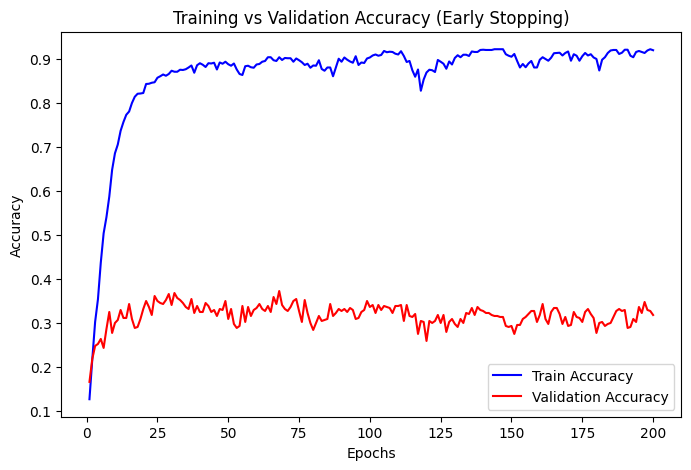

In [ ]:
import numpy as np
import torch
from collections import Counter

# Loop parameters
epochs = 100  # Maximum number of epochs
patience = 10  # Number of epochs to wait before stopping
best_val_accuracy = 0  # Track the best validation accuracy
early_stopping_epoch = 0  # Store the epoch where early stopping occurs
counter = 0  # Count epochs without improvement

# Store accuracies to plot later
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):

    # mlflow.autolog()

    # Training mode
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for images, label in train_loader:
        images, label = images.to(device), label.to(device)
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()

        # Accumulate statistics
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == label).sum().item()
        total += label.size(0)

    # Calculate and log training accuracy
    train_accuracy = correct / total
    train_accuracies.append(train_accuracy)

    # mlflow.log_metric("train_loss", total_loss, step=epoch)
    # mlflow.log_metric("train_accuracy", train_accuracy, step=epoch)

    # Validation phase
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for images, label in val_loader:
            images, label = images.to(device), label.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            predictions.extend(preds.cpu().numpy())
            actuals.extend(label.cpu().numpy())

    # Compute validation accuracy
    val_accuracy = np.mean(np.array(predictions) == np.array(actuals))
    val_accuracies.append(val_accuracy)
    # mlflow.log_metric("val_accuracy", val_accuracy, step=epoch)
    f1 = f1_score(actuals, predictions, average='macro')
    # mlflow.log_metric("val_f1_score", f1, step=epoch)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Validation Accuracy: {val_accuracy:.4f}, F1 Score: {f1:.4f}")

    # Early Stopping Check
    if early_stop:
      if val_accuracy > best_val_accuracy:
          best_val_accuracy = val_accuracy
          counter = 0
      else:
          counter += 1
      if counter >= patience:
          print(f"Early stopping at epoch {epoch+1}")
          early_stopping_epoch = epoch + 1
          break  # Stop training

# Plot the accuracy over the epochs
plt.figure(figsize=(8, 5))
epochs_range = range(1, len(train_accuracies) + 1)
plt.plot(epochs_range, train_accuracies, label="Train Accuracy", color='blue')
plt.plot(epochs_range, val_accuracies, label="Validation Accuracy", color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (Early Stopping)")
plt.legend()
plt.show()

[[ 5  0  4 14 16  0  4  1  5]
 [ 1  8  6 11  2  1  6  8  6]
 [ 2  3 13 10  4  5  2  2  8]
 [ 2  1  2 33  1  1  4  1  4]
 [ 3  0  2 10 25  1  2  3  2]
 [ 1  4 10  8  4 12  3  5  2]
 [ 1  5  2 18  2  1  9  6  5]
 [ 3  5  4 11  4  2  5 11  4]
 [ 0  1  8 13  0  0  0  3 24]]


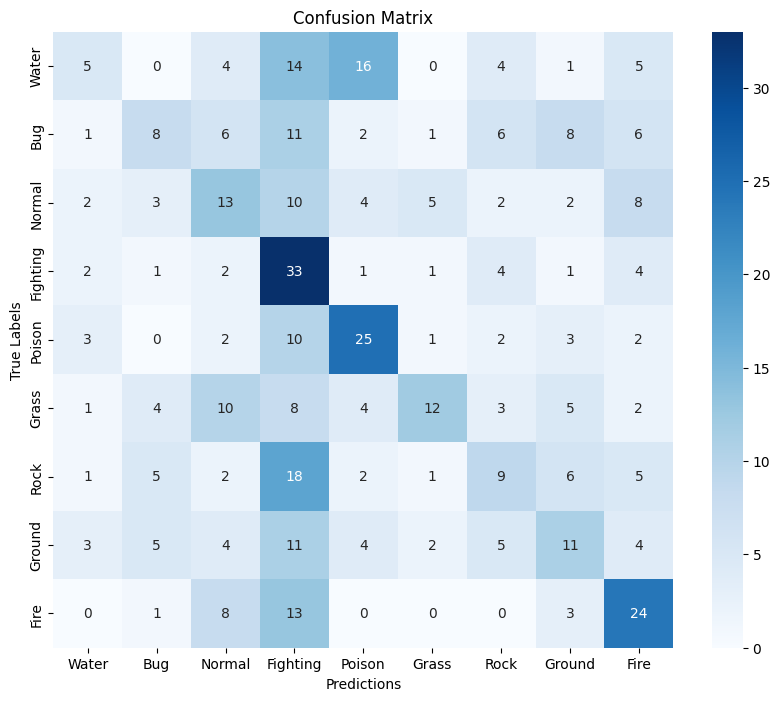

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(actuals, predictions)
print(conf_matrix)
# Plot confusion matrix
POKEMON_TYPES= train_df['label'].unique()
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=POKEMON_TYPES, yticklabels=POKEMON_TYPES)
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## 8. Prediction on the test data

In [ ]:
ON_TRAINING = False
isolate_every_pokemon()

The folder 'Test' does not exist.


In [ ]:
import pandas as pd
import os
import torch
from torchvision import transforms
from PIL import Image

# Define image transformations (same as used during training)
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Ensure same size as training images
    transforms.ToTensor()
])

# Path to the folder containing test images
test_folder = my_path + "Test_processed"

# Load test images
test_images = [f for f in os.listdir(test_folder) if f.endswith(".png")]

# Create label-to-index mapping
unique_labels = train_df["label"].unique()
label_map = {Id: label for Id, label in enumerate(unique_labels)}

# Put model in evaluation mode
model.eval()

# Store results
submission_results = []

# Disable gradient computation for inference
with torch.no_grad():
    for img_name in test_images:
        img_path = os.path.join(test_folder, img_name)
        image = Image.open(img_path).convert("RGB")
        image = transform(image).unsqueeze(0).to(device)  # Add batch dimension & move to GPU

        # Get model predictions
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)  # Get predicted class index

        # Remove ".png" extension and store result
        img_id = img_name.replace(".png", "")
        submission_results.append([img_id, label_map[predicted.item()]])

# Convert results to DataFrame
submission_df = pd.DataFrame(submission_results, columns=["Id", "Label"])

# Save to CSV file
submission_df.to_csv("../submission_task1.csv", index=False, header=True)

print("Submission file 'submission.csv' has been created successfully!")


Submission file 'submission.csv' has been created successfully!


## 9. Some training metrics without using MLFlow

In [ ]:
from sklearn.metrics import classification_report

# Put model in evaluation mode
model.eval()

# Store actual and predicted labels
train_predictions = []
train_actuals = []

with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        train_predictions.extend(preds.cpu().numpy())
        train_actuals.extend(labels.cpu().numpy())

# Compute classification report
train_report = classification_report(train_actuals, train_predictions, digits=4)
print("Training Set Metrics:\n", train_report)


Training Set Metrics:
               precision    recall  f1-score   support

           0     0.9588    0.8359    0.8932       195
           1     0.9712    0.6923    0.8084       195
           2     0.8985    0.9077    0.9031       195
           3     0.7866    0.9641    0.8664       195
           4     0.9330    0.9949    0.9630       196
           5     0.9511    0.8974    0.9235       195
           6     0.9427    0.9282    0.9354       195
           7     0.9538    0.9538    0.9538       195
           8     0.8312    0.9846    0.9014       195

    accuracy                         0.9066      1756
   macro avg     0.9141    0.9066    0.9053      1756
weighted avg     0.9141    0.9066    0.9054      1756



In [ ]:
# Store actual and predicted labels
val_predictions = []
val_actuals = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        val_predictions.extend(preds.cpu().numpy())
        val_actuals.extend(labels.cpu().numpy())

# Compute classification report
val_report = classification_report(val_actuals, val_predictions, digits=4)
print("Validation Set Metrics:\n", val_report)


Validation Set Metrics:
               precision    recall  f1-score   support

           0     0.2778    0.1020    0.1493        49
           1     0.2963    0.1633    0.2105        49
           2     0.2549    0.2653    0.2600        49
           3     0.2578    0.6735    0.3729        49
           4     0.4310    0.5208    0.4717        48
           5     0.5217    0.2449    0.3333        49
           6     0.2571    0.1837    0.2143        49
           7     0.2750    0.2245    0.2472        49
           8     0.4000    0.4898    0.4404        49

    accuracy                         0.3182       440
   macro avg     0.3302    0.3186    0.2999       440
weighted avg     0.3300    0.3182    0.2996       440

